<a href="https://colab.research.google.com/github/shakhawat17/Data-Science/blob/main/6_Introduction_to_Machine_Learning_Skill_Morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Welcome to Cancer Detection with Skill Morph!")
print("We will build a Skill Moprh Doctor to detect breast cancer!")

Welcome to Cancer Detection with Skill Morph!
We will build a Skill Moprh Doctor to detect breast cancer!


# **Introduction**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [ ]:
print(" Reading the real cancer dataset...")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/datasets/Breast_Cancer_Wisconsin_Dataset.csv')

print(f" Dataset loaded! We have data from {len(data)} real patients")
print(f" Each patient has {len(data.columns)-2} medical measurements")

# Show first few patients
print("\n First 5 patients in our dataset:")
print(data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'area_mean']].head())

# Understand diagnosis column
print(f"\n Understanding Diagnosis:")
diagnosis_counts = data['diagnosis'].value_counts()
print(f"M (Malignant = Cancer):     {diagnosis_counts['M']} patients")
print(f"B (Benign = No Cancer):     {diagnosis_counts['B']} patients")
print(f"Total patients:             {len(data)} patients")

 Reading the real cancer dataset...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dataset loaded! We have data from 569 real patients
 Each patient has 31 medical measurements

 First 5 patients in our dataset:
         id diagnosis  radius_mean  texture_mean  area_mean
0    842302         M        17.99         10.38     1001.0
1    842517         M        20.57         17.77     1326.0
2  84300903         M        19.69         21.25     1203.0
3  84348301         M        11.42         20.38      386.1
4  84358402         M        20.29         14.34     1297.0

 Understanding Diagnosis:
M (Malignant = Cancer):     212 patients
B (Benign = No Cancer):     357 patients
Total patients:             569 patients


# **Prepare Data**

In [ ]:
print("Computers only understand numbers, not letters!")
print("Converting M → 1 (Cancer) and B → 0 (No Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})
print("Conversion completed!")

# Select only the most important features (make it simple!)
important_features = [
    'radius_mean',      # Size of tumor
    'texture_mean',     # Surface texture
    'area_mean',        # Area of tumor
    'smoothness_mean',  # How smooth the surface is
    'compactness_mean', # How compact the tumor is
]


# Create simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Cancer (1) or No Cancer (0)

print(f"\nData prepared:")
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

Computers only understand numbers, not letters!
Converting M → 1 (Cancer) and B → 0 (No Cancer)
Conversion completed!

Data prepared:
X (measurements): (569, 5)
y (diagnosis): (569,)


# **Train and Test Split**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.tail())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean
218        19.80         21.56     1230.0          0.09383           0.13060
223        15.75         20.25      761.3          0.10250           0.12040
271        11.29         13.04      388.0          0.09834           0.07608
474        10.88         15.62      358.9          0.10070           0.10690
355        12.56         19.07      485.8          0.08760           0.10380


# **Train with Decision Tree**

In [ ]:
# Create our Skill Morph model
skillmorph_doctor = DecisionTreeClassifier(
    max_depth=4,  # Keep it simple - not too complex
    random_state=42
)

print("Teaching Skill Morph doctor with training data...")
# Train the model
skillmorph_doctor.fit(X_train, y_train)
print("Skill Morph doctor training completed!")

print("\n Skill Morph Doctor has learned to recognize patterns like:")
print("- If tumor radius > 15mm AND texture rough → High cancer risk")
print("- If tumor area small AND smooth → Low cancer risk")
print("- And many more complex patterns!")

Teaching Skill Morph doctor with training data...
Skill Morph doctor training completed!

 Skill Morph Doctor has learned to recognize patterns like:
- If tumor radius > 15mm AND texture rough → High cancer risk
- If tumor area small AND smooth → Low cancer risk
- And many more complex patterns!


# **Test our Skill Morph Doctor**

In [ ]:
print("Now let's see how good our Skill Morph doctor is...")
print("Testing on patients it has NEVER seen before!")

# Make predictions
predictions = skillmorph_doctor.predict(X_test)
prediction_probabilities = skillmorph_doctor.predict_proba(X_test)[:, 1]  # Probability of cancer (class 1)
print("Skill Morph doctor made predictions for all test patients!")
print(f" Note: We also got probability scores (confidence levels) for each prediction!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\n Skill Morph Doctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our Skill Morph doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our Skill Morph doctor performs well!")
elif accuracy > 0.80:
    print(" OK! Our Skill Morph doctor is decent!")
else:
    print(" Needs improvement...")

# Show some predictions vs reality
print(f"\n Let's check some predictions:")
print("Patient | Actual    | Skill Morph Predicted | Correct?")
print("-" * 50)

# Show some predictions vs reality with confidence
print(f"\n🔍 Let's check some predictions with confidence:")
print("Patient | Actual    | Skill Morph Predicted | Confidence | Correct?")
print("-" * 65)

for i in range(10):
    actual = "Cancer" if y_test.iloc[i] == 1 else "No Cancer"
    predicted = "Cancer" if predictions[i] == 1 else "No Cancer"
    confidence = prediction_probabilities[i] * 100
    correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
    print(f"{i+1:7} | {actual:9} | {predicted:17} | {confidence:8.1f}%  | {correct}")

Now let's see how good our Skill Morph doctor is...
Testing on patients it has NEVER seen before!
Skill Morph doctor made predictions for all test patients!
 Note: We also got probability scores (confidence levels) for each prediction!

 Skill Morph Doctor Accuracy: 0.904 (90.4%)
GOOD! Our Skill Morph doctor performs well!

 Let's check some predictions:
Patient | Actual    | Skill Morph Predicted | Correct?
--------------------------------------------------

🔍 Let's check some predictions with confidence:
Patient | Actual    | Skill Morph Predicted | Confidence | Correct?
-----------------------------------------------------------------
      1 | No Cancer | No Cancer         |     22.2%  | ✅
      2 | Cancer    | Cancer            |    100.0%  | ✅
      3 | Cancer    | Cancer            |    100.0%  | ✅
      4 | No Cancer | No Cancer         |      5.1%  | ✅
      5 | Cancer    | No Cancer         |      0.0%  | ❌
      6 | Cancer    | Cancer            |    100.0%  | ✅
      7 | Ca

# Confusion Matrix

Confusion Matrix (Mistake Analysis):
[[62  4]
 [ 7 41]]

📖 How to read Confusion Matrix:

                 Skill Morph Predicted
              No Cancer  Cancer
Real No Cancer    62      4   ← 4 False Alarms (told cancer but no cancer)
Real Cancer       7      41   ← 7 Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: 103
❌ Wrong Predictions: 11

⚠️ DANGER: Missing cancer (7 cases) is more dangerous than false alarms (4 cases)



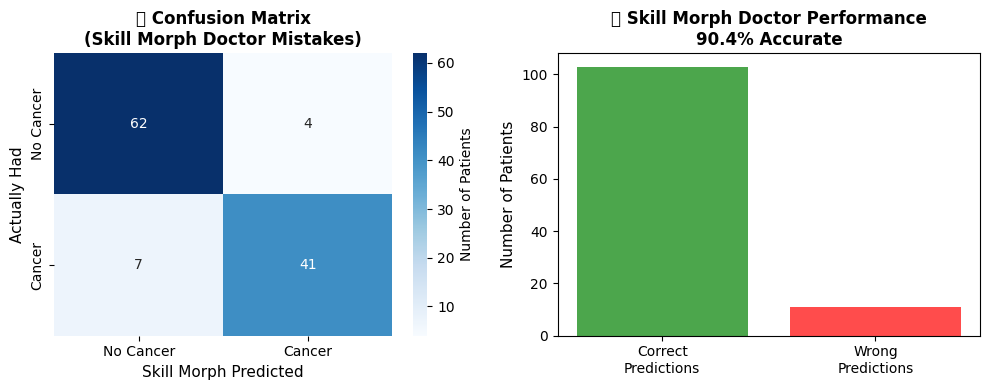

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\n📖 How to read Confusion Matrix:")
print(f"""
                 Skill Morph Predicted
              No Cancer  Cancer
Real No Cancer    {cm[0,0]}      {cm[0,1]}   ← {cm[0,1]} False Alarms (told cancer but no cancer)
Real Cancer       {cm[1,0]}      {cm[1,1]}   ← {cm[1,0]} Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('🎭 Confusion Matrix\n(Skill Morph Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Skill Morph Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'📊 Skill Morph Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)


plt.tight_layout()
plt.show()

# **Detailed Performance**


Think of Skill Morph as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall

ACCURACY : 0.9035 (90.35%)
PRECISION: 0.9111 (91.11%)
RECALL   : 0.8542 (85.42%)
F1-SCORE : 0.8817 (88.17%)
👍 Precision is good (few false alarms)
⚠️ Recall needs improvement (misses some cancers)


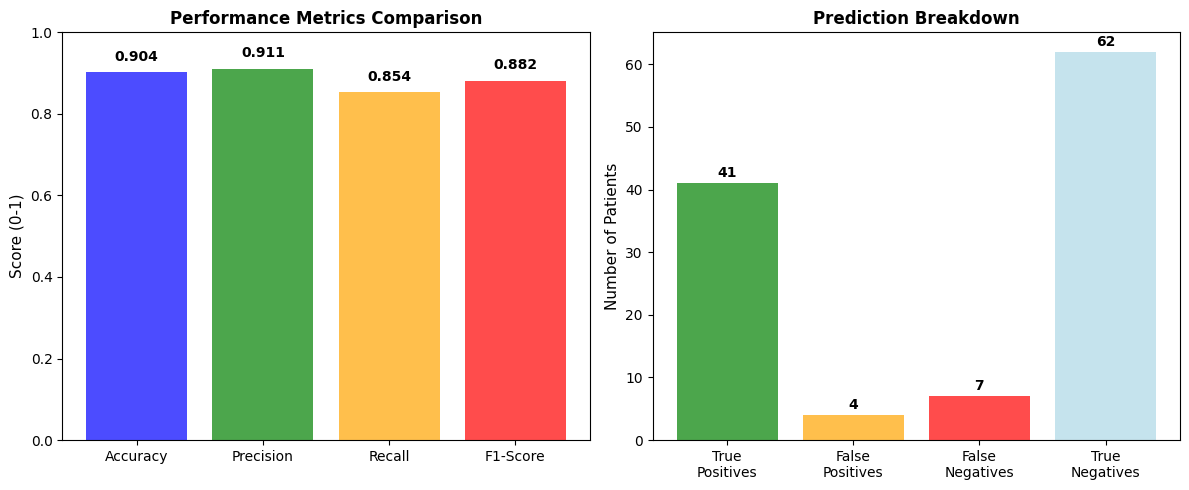

In [ ]:
print("""
Think of Skill Morph as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall
""")

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print results
print(f"ACCURACY : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL   : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE : {f1:.4f} ({f1*100:.2f}%)")

# Quick interpretation
if precision > 0.9:
    print("👍 Precision is good (few false alarms)")
else:
    print("⚠️ Precision needs improvement (too many false alarms)")

if recall > 0.9:
    print("👍 Recall is good (catches most cancers)")
else:
    print("⚠️ Recall needs improvement (misses some cancers)")

# Create 2 charts side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Prediction Breakdown (TP/FP/FN/TN)
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

# Add value labels
for bar, count in zip(bars_pr, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


ROC CURVE & AUC - ADVANCED EVALUATION


ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing

AUC Score: 0.9695 (96.95%)


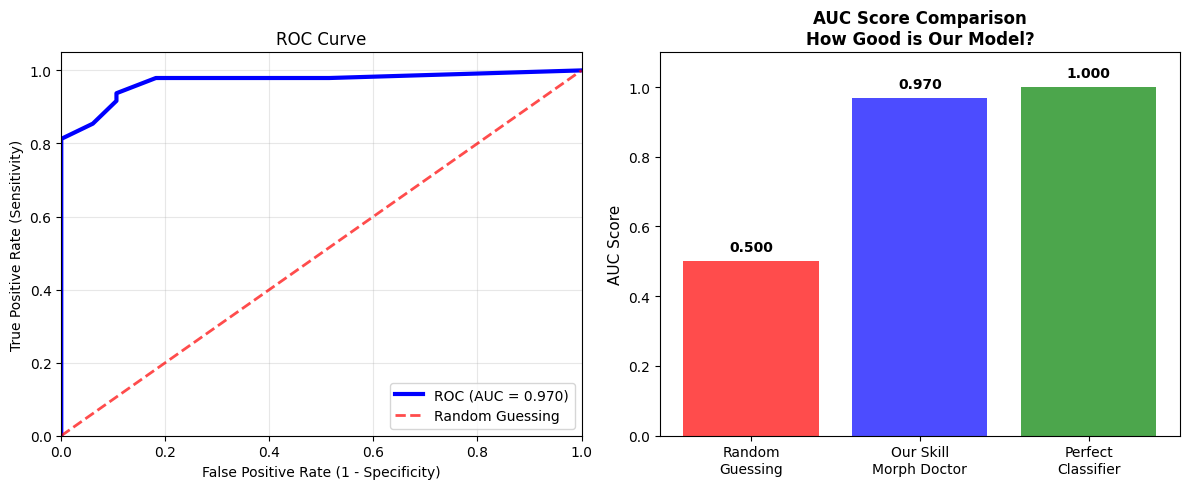

In [ ]:
print("""
ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing
""")

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create figure with 2 subplots (ROC + AUC Comparison)
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=3, color='blue', label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Skill\nMorph Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

# Add value labels
for bar, score in zip(bars_auc, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Assignment

In [ ]:
Question 1: Find the Best Tree Depth

Task: Test depths 2, 3, 4, 5 and find highest accuracy


Question 2: Calculate All Metrics

Task: Use best depth to calculate precision, recall, F1-score


Question 3: Test on New Patients


Question 4: Analyze Confusion Matrix